In [2]:
#直方图
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread( './img/df1.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape

(256, 1)

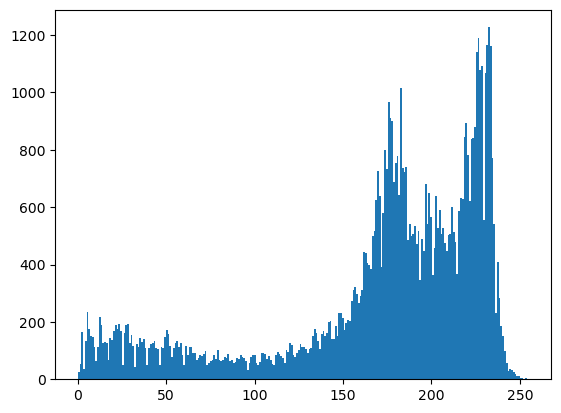

In [3]:
plt.hist(img.ravel(),256)
plt.show()

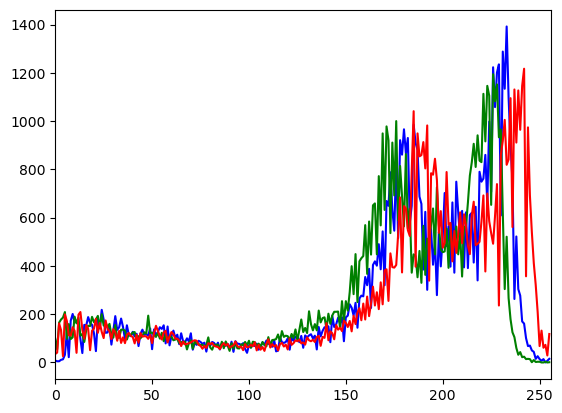

In [3]:
img = cv2.imread('./img/df1.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

In [19]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
#创建mask
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:400] = 255
cv_show('mask',mask)

In [8]:
img = cv2.imread('./img/df1.jpg',0)
cv_show('img',img)

In [9]:
masked_img = cv2.bitwise_and(img,img,mask=mask)
cv_show('masked_img',masked_img)

In [10]:
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

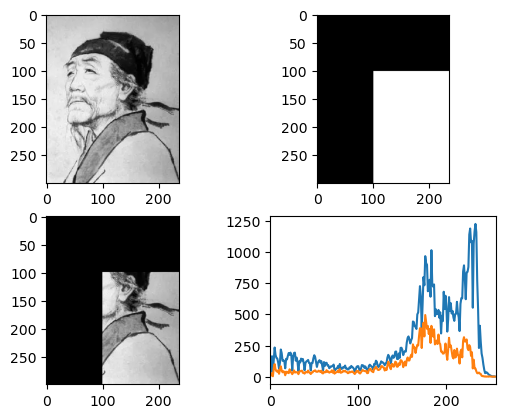

In [11]:
plt.subplot(221)
plt.imshow(img,'gray')
plt.subplot(222)
plt.imshow(mask,'gray')
plt.subplot(223)
plt.imshow(masked_img,'gray')
plt.subplot(224)
plt.plot(hist_full)
plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

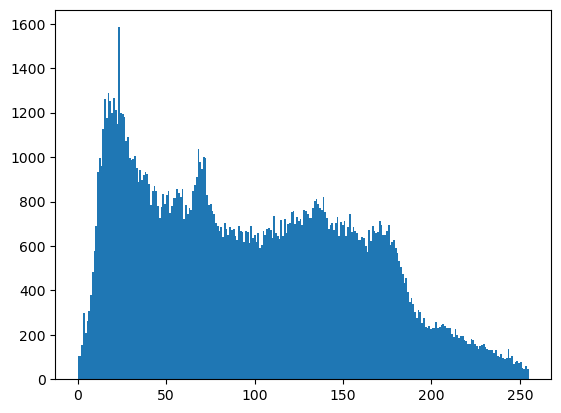

In [25]:
#直方图均衡化
img = cv2.imread('./img/clahe.jpg',0)
plt.hist(img.ravel(),256)
plt.show()

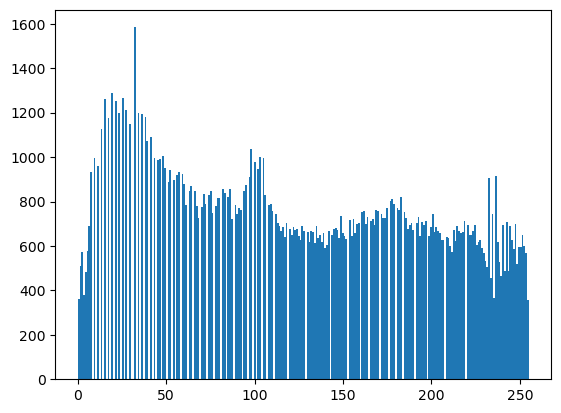

In [26]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show()

In [ ]:
res = np.hstack((img,equ))
cv_show('res',res)

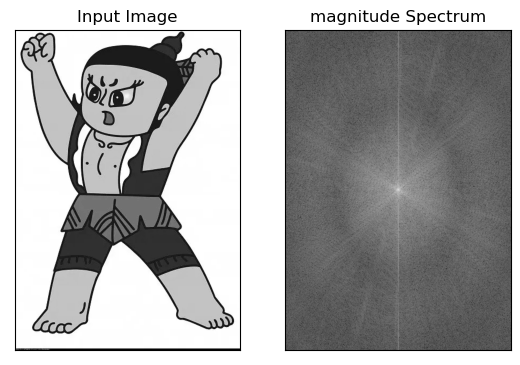

In [18]:
#傅里叶变换
img=cv2.imread('./img/hlw.jpg',0)
img_float32 =np.float32(img)
dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
               
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
               
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

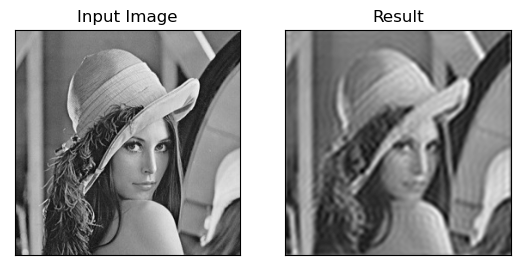

In [6]:
#频域滤波中低通滤波
img = cv2.imread( './img/lena.jpg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift= np.fft.fftshift(dft)

rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2)

#低通跨波

mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30]=1

#IDFI
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
# img_back = cv2.magnitude(img_back[;,;,0], img_back[;,;,1])
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back,cmap='gray')
plt.title('Result')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#频域滤波中低通滤波
img = cv2.imread('./img/hlw.jpg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)


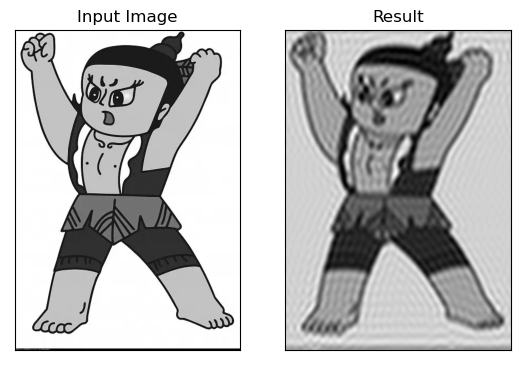

In [2]:
#频域滤波中低通滤波
img = cv2.imread('./img/hlw.jpg', 0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

#低通滤波
mask = np.zeros((rows, cols, 2), np.float32)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

#IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.title('Result')
plt.xticks([])
plt.yticks([])
plt.show()

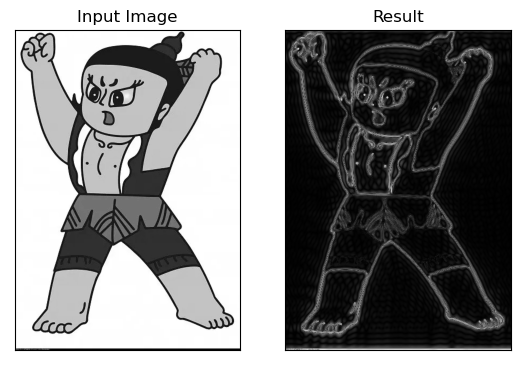

In [11]:
#频域滤波中高通滤波
img = cv2.imread('./img/hlw.jpg',0)
img_float32 =np.float32(img)
dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2)

#高通滤波
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30]=0
#IDFT
fshift = dft_shift*mask
f_ishift=np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back,cmap='gray')
plt.title('Result')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
#再次读取图片
img = cv2.imread('./img/hlw.jpg' ,0)

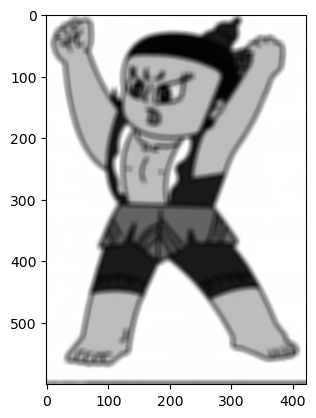

In [8]:
#均值滤波
img_mean = cv2.blur(img, (11,11))
plt.imshow(img_mean,cmap='gray' )

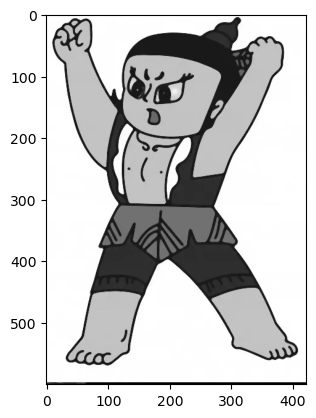

In [10]:
#中值滤波
img_median = cv2.medianBlur(img,5)
plt.imshow(img_median,cmap='gray')

In [11]:
#拉普拉斯锐化处理
#kernel lap = nparrav([[0,-1,0][-1,4-1], 10,-1, 01],dtype=np.float32)
kernel_lap = np.array([[1,0,1],
                      [0,-4,0],
                      [1,0,1]],dtype=np.float32)
img_lap=cv2.filter2D(img_median,-1,kernel_lap)
#标定结果的阈值
threshold = 50

img_lap_thresh =np.where(img_lap > threshold,img_lap,0)

result = cv2.add(img_median,img_lap_thresh)

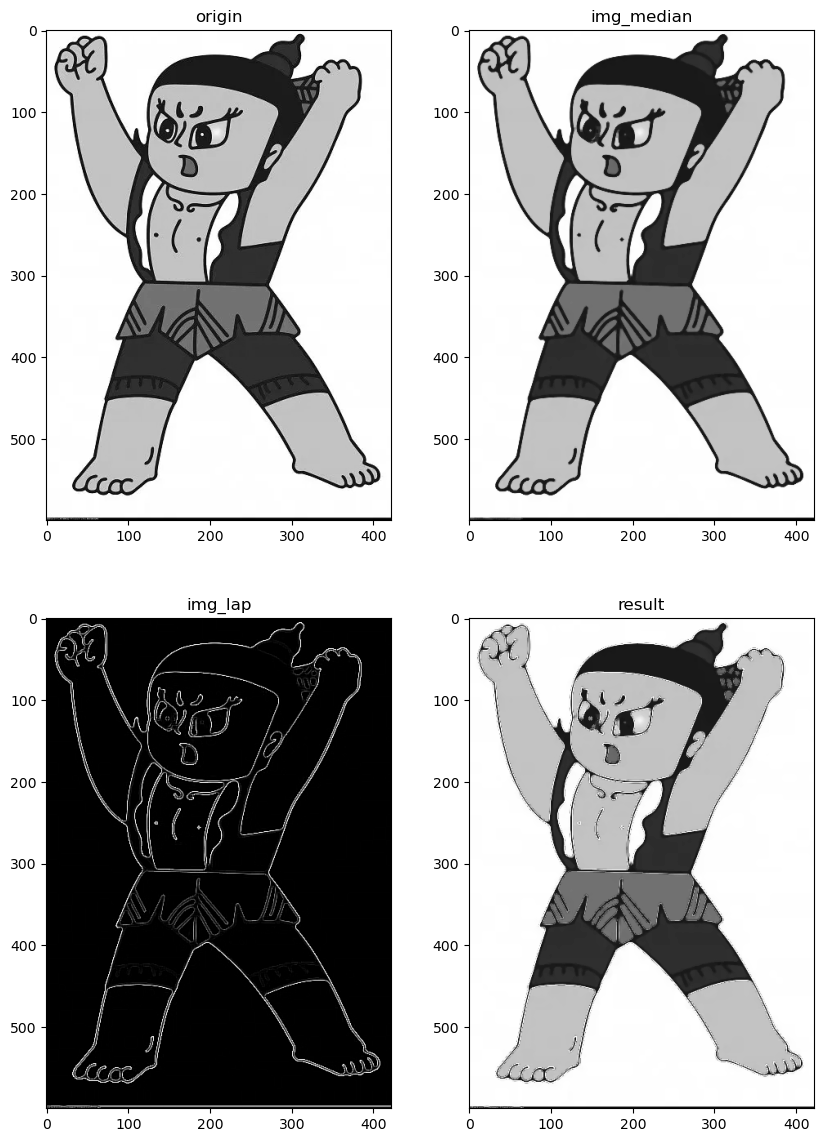

In [15]:
plt.figure(figsize=(10,14))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('origin')
plt.subplot(222)
plt.imshow(img_median, cmap='gray')
plt.title( 'img_median' )
plt.subplot(223)
plt.imshow(img_lap, cmap='gray')
plt.title('img_lap' )
plt.subplot(224)
plt.imshow(result, cmap='gray')
plt.title('result')
plt.show()